In [6]:
from keras.api.utils import image_dataset_from_directory
from keras.api.models import Sequential
from keras.api.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.api import optimizers

input_shape=(64, 64, 3)
image_size=(64, 64)

# Create the model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
opt = optimizers.Adagrad(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Showing the model summary and saving the model structure
model.summary()

# Import dataset
train_set = image_dataset_from_directory(
    "dataset/trainset",
    image_size=image_size,
    batch_size=1,
    shuffle=True
)

test_set = image_dataset_from_directory(
    "dataset/testset",
    image_size=image_size,
    batch_size=1,
    shuffle=False
)

# Fit the model
history = model.fit(
    x=train_set,
    epochs=10,
    validation_data=test_set
)

# Save the model
model.save("./desktop/model.keras")
model.save("./web/model.keras")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,644,609 (6.27 MB)

 Trainable params: 1,644,609 (6.27 MB)

 Non-trainable params: 0 (0.00 B)

Found 11987 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Epoch 1/10
11987/11987 ━━━━━━━━━━━━━━━━━━━━ 9s 691us/step - accuracy: 0.9270 - loss: 1.4664 - val_accuracy: 1.0000 - val_loss: 0.0226
Epoch 2/10
11987/11987 ━━━━━━━━━━━━━━━━━━━━ 8s 675us/step - accuracy: 0.9967 - loss: 0.0115 - val_accuracy: 1.0000 - val_loss: 0.0173
Epoch 3/10
11987/11987 ━━━━━━━━━━━━━━━━━━━━ 8s 678us/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0184
Epoch 4/10
11987/11987 ━━━━━━━━━━━━━━━━━━━━ 8s 673us/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0124
Epoch 5/10
11987/11987 ━━━━━━━━━━━━━━━━━━━━ 8s 676us/step - accuracy: 1.0000 - loss: 8.9311e-04 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 6/10
11987/11987 ━━━━━━━━━━━━━━━━━━━━ 8s 677us/step - accuracy: 1.0000 - loss: 6.8662e-04 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 7/10
11987/11987 ━━━━━━━━━━━━━━━━━━━━ 8s 680us/step - accuracy: 1.0000 - loss: 5.6209e-04 - val_accu

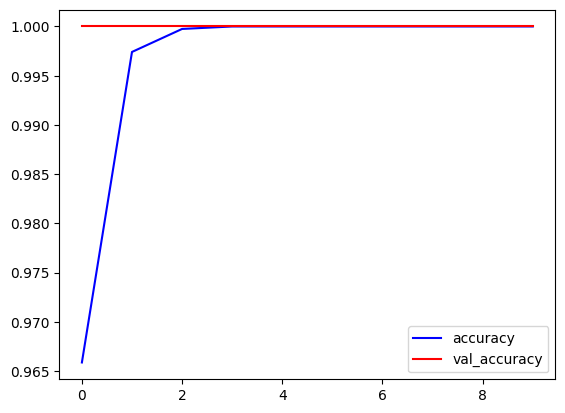

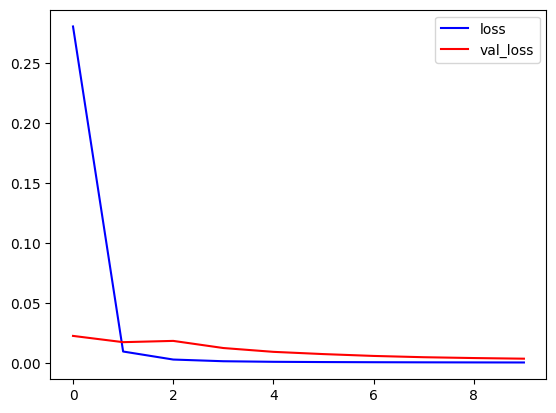

In [7]:
import sys
sys.dont_write_bytecode=True
import plotter

plotter.create_plot_keras(history, metric="accuracy", validation=True)
plotter.create_plot_keras(history, metric="loss", validation=True)